In [1]:

#Import library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
#Read data
url = "https://storage.googleapis.com/dqlab-dataset/heart_disease.csv"
column_names = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, names=column_names, skiprows=[0])

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [5]:
#Check dtype columns and missing values in data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


There is no missing values in the data. 
Most of the dtype of columns are int64, including a categorical columns.

In [6]:
#Change categorical columns dtype from int64 to object
data = df.copy()
categorical_columns = ['sex','cp','fbs','restecg','exang','slope','thal','ca','target']
data[categorical_columns] = data[categorical_columns].astype('object')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(1), int64(4), object(9)
memory usage: 112.2+ KB


# Data Quality

Check the distribution of the data

In [7]:
#check unique values in ca column
data['ca'].value_counts()

0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

In [8]:
#check unique values in thal column
data['thal'].value_counts()

2    544
3    410
1     64
0      7
Name: thal, dtype: int64

In [9]:
# Fillna pada kolom 'ca' dengan modus
modus_ca = data['ca'].mode()[0]
data.loc[data['ca']==4, 'ca'] = modus_ca
# Fillna pada kolom 'thal' dengan modus
modus_thal = data['thal'].mode()[0]
data.loc[data['thal']==0, 'thal'] = modus_thal

In [10]:
#check unique values in thal column
data['thal'].value_counts()

2    551
3    410
1     64
Name: thal, dtype: int64

In [11]:
#check unique values in ca column
data['ca'].value_counts()

0    596
1    226
2    134
3     69
Name: ca, dtype: int64

In [12]:
#Replace value
data['thal'] = data['thal'].replace([1, 2, 3],[0, 1, 2])

In [13]:
#check unique values in thal column
data['thal'].value_counts()

1    551
2    410
0     64
Name: thal, dtype: int64

In [14]:
data['thal'] = data['thal'].astype('object')

In [15]:
data.duplicated().sum()

723

In [16]:
# Remove duplicated data
data.drop_duplicates(keep='first',inplace=True)

# Check duplicated data
data.duplicated().sum()

0

In [17]:
#Check the distribution of numerical columns
data.describe(exclude='object')

,age,trestbps,chol,thalach,oldpeak
count,302.00000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,131.602649,246.500000,149.569536,1.043046
std,9.04797,17.563394,51.753489,22.903527,1.161452
min,29.00000,94.000000,126.000000,71.000000,0.000000
25%,48.00000,120.000000,211.000000,133.250000,0.000000
50%,55.50000,130.000000,240.500000,152.500000,0.800000
75%,61.00000,140.000000,274.750000,166.000000,1.600000
max,77.00000,200.000000,564.000000,202.000000,6.200000


What we got from the describe method are:
1. Average age is 54 from 29 years old to 77 years old
2. Average value of Blood pressure when resting is 131.6 with range 94 mm/HG to 200 mm/HG
3. Average value of cholesterol is 246 with range 126 to 564
4. The average of maximum heartbeat is 149 with range 71 to 202
5. The average of ST Depression realtive to rest induced with| workout is 1.07 with range 0 to 6.2

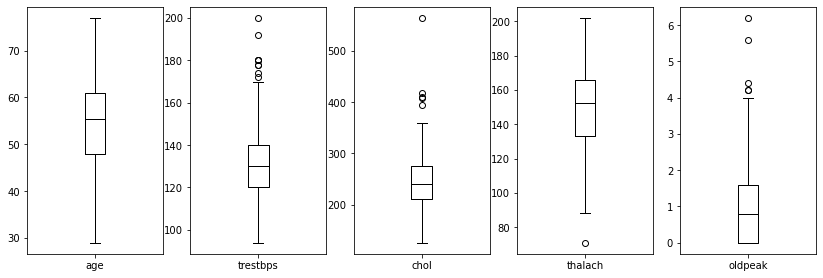

In [18]:
#Check the outliers
data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

In [19]:
#Check the amount of outliers in numerical columns
def outliers(data, drop=False):
    for feature in data.select_dtypes(exclude='object').columns:
        data_feature = data[feature]
        Q1 = np.percentile(data_feature, 25.)
        Q3 = np.percentile(data_feature, 75.)
        iqr = Q3 - Q1
        outlier = iqr * 1.5
        data_outlier = data_feature[~((data_feature >= Q1 - outlier) & (data_feature <= Q3 + outlier))].index.tolist()
        if not drop:    
            print(f'{len(data_outlier)} outliers in {feature}')
        else:
            print(f'{len(data_outlier)} outliers in {feature}')
            data.drop(data_outlier, inplace=True)
            print(f'outliers from {feature} removed')
            print(f'{len(data_outlier)} outliers in {feature}')

outliers(data)

0 outliers in age
9 outliers in trestbps
5 outliers in chol
1 outliers in thalach
5 outliers in oldpeak


In [20]:
#drop the outliers
outliers(data, drop=True)

0 outliers in age
outliers from age removed
0 outliers in age
9 outliers in trestbps
outliers from trestbps removed
9 outliers in trestbps
5 outliers in chol
outliers from chol removed
5 outliers in chol
1 outliers in thalach
outliers from thalach removed
1 outliers in thalach
4 outliers in oldpeak
outliers from oldpeak removed
4 outliers in oldpeak


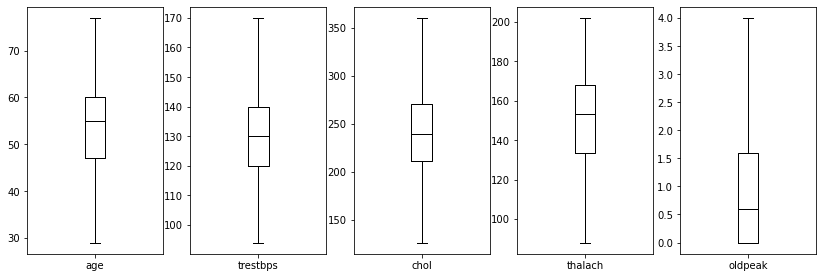

In [21]:
#Check the outliers after drop the outliers
data.plot(kind = 'box', subplots = True, layout = (2,7), sharex = False, sharey = False, figsize = (20, 10), color = 'k')
plt.show()

Check duplicated data

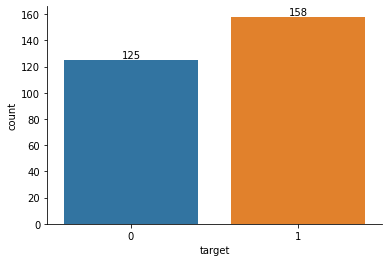

In [22]:
#Check the imbalance of the data
ax = sns.countplot(x=data['target'],data=data)
for label in ax.containers:
    ax.bar_label(label)
sns.despine()
plt.show()

In [23]:
# data.to_csv('data_cleaned.csv', index=False)

# Determine the features

<AxesSubplot:>

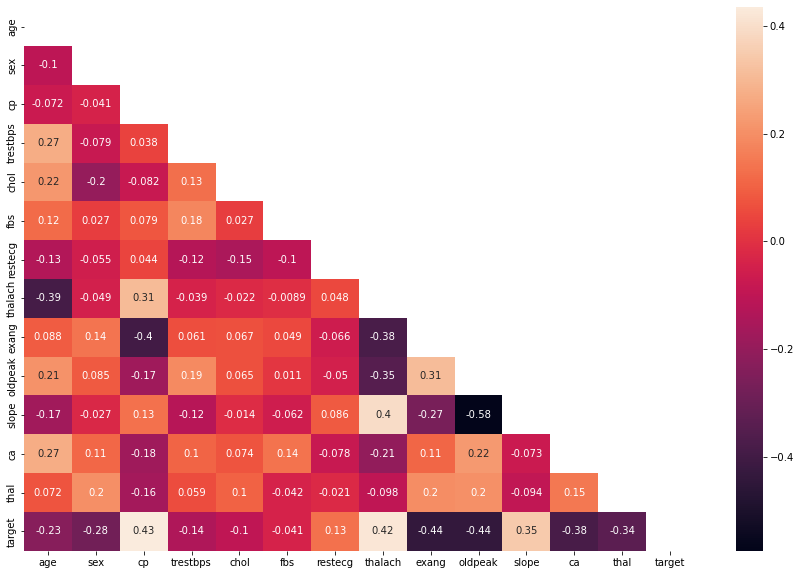

In [24]:
corr = df.corr()
plt.figure(figsize=(15,10))
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,mask=mask, annot=True)

Correlation Target with others variable:
1. age: -0.23 (meh)
2. sex: -0.28 (meh)
3. cp: 0.43 (Strong)
4. trestbps: -0.14 (Weak)
5. chol: -0.1 (weak)
6. fbs: -0.041 (weak)
7. restecg: 0.13 (weak)
8. thalach: 0.42 (Strong) 
9. exang: -0.44 (Strong) 
10. oldpeak: -0.44 (Strong) 
11. slope: 0.35 (Strong) 
12. ca: -0.38 (Strong) 
13. thal: -0.34 (Strong)

Thus, the features that going to use are:
['age', 'sex', 'cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [25]:
#Filter columns with a chosen features
chosen_features = ['age', 'sex','cp', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = data[chosen_features]
data.to_csv('data_cleaned(1.1).csv', index=False)

In [26]:
# Scaling data and get data train
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop("target", axis=1))

In [27]:
X_scaled[0]

array([-0.22491878,  0.65520449, -0.95761576,  0.7963654 , -0.68287718,
        0.0469034 ,  0.95695623,  1.50500896,  1.1915523 ])

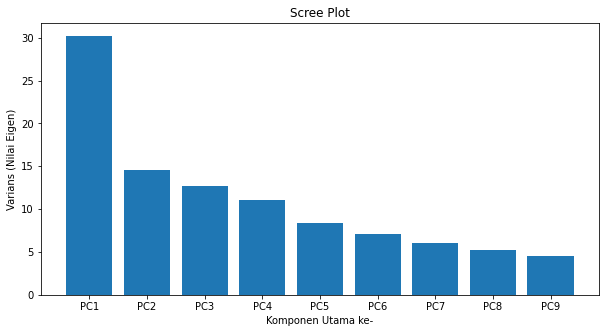

In [28]:
# Perform PCA for dimensionality reduction
feature_number = len(X_scaled[0])
pca = PCA(.99)

# Fit PCA with dataset
pca.fit(X_scaled)

# Get variance information
variance_ratio = pca.explained_variance_ratio_

# Calculate cummulative
cumulative_variance = np.cumsum(variance_ratio)

# Create Bar Plot
var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range (1, len(var)+1)]
plt.figure(figsize=(10,5))
plt.bar(x = range(1, len(var) + 1), height=var, tick_label=labels)
plt.xlabel('Komponen Utama ke-')
plt.ylabel('Varians (Nilai Eigen)')
plt.title('Scree Plot')
plt.show()

In [29]:
feature_names = data.drop('target', axis=1).columns.to_list()
component_names = [f"PC{i+1}" for i in range(pca.n_components_)]

for component, component_name in zip(pca.components_, component_names):
    feature_indices = component.argsort()[::-1]
    retained_features = [feature_names[idx] for idx in feature_indices[:pca.n_components_]]
    print(f"{component_name}: {retained_features}")

PC1: ['oldpeak', 'exang', 'ca', 'age', 'thal', 'sex', 'cp', 'slope', 'thalach']
PC2: ['age', 'cp', 'ca', 'oldpeak', 'slope', 'thalach', 'exang', 'thal', 'sex']
PC3: ['oldpeak', 'cp', 'exang', 'thalach', 'sex', 'thal', 'age', 'ca', 'slope']
PC4: ['cp', 'sex', 'thal', 'ca', 'oldpeak', 'thalach', 'age', 'slope', 'exang']
PC5: ['sex', 'ca', 'exang', 'oldpeak', 'slope', 'thalach', 'cp', 'age', 'thal']
PC6: ['ca', 'thalach', 'oldpeak', 'thal', 'slope', 'exang', 'sex', 'cp', 'age']
PC7: ['exang', 'cp', 'slope', 'thalach', 'oldpeak', 'ca', 'thal', 'age', 'sex']
PC8: ['ca', 'cp', 'thal', 'exang', 'sex', 'slope', 'oldpeak', 'thalach', 'age']
PC9: ['thalach', 'exang', 'ca', 'age', 'thal', 'cp', 'sex', 'oldpeak', 'slope']
